In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
cd ~/PYTHON/ECOGpy/

/home/knight/matar/PYTHON/ECOGpy


In [13]:
from utils import loadmat, fdr_correct
from __future__ import division
import pandas as pd
import os
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.stats as stats

In [14]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = os.path.join(SJdir, 'PCA', 'csvs_FINAL', 'mean_traces_all_subjs_dropSR.csv')
df = pd.read_csv(filename)

In [24]:
savedir = os.path.join(SJdir, 'PCA','Figures')
#load data (without my data, without SR)
p = 'D'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR_empty.mat')
data_dict = loadmat.loadmat(filename)
alldata, allRTs, allsubjs, alltasks, alloffsets = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks', 'alloffsets']]

p = 'R'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR_empty.mat')
data_dict = loadmat.loadmat(filename)
alldata_resp, allRTs_resp, allsubjs_resp, alltasks_resp, alloffsets_resp = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks', 'alloffsets']]

p = 'SR'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR_empty.mat')
data_dict = loadmat.loadmat(filename)
alldata_SR, allRTs_SR, allsubjs_SR, alltasks_SR, alloffsets_SR = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks', 'alloffsets']]


In [25]:
allRTs_resp

In [26]:
print 'D - max: %.3f, peak: %ims' %(np.max(alldata.mean(axis = 0)), np.argmax(alldata.mean(axis =0))-500)
print 'SR - max: %.3f, peak: %ims' %(np.max(alldata_SR.mean(axis = 0)), np.argmax(alldata_SR.mean(axis =0))-500)
print 'R - max: %.3f, peak: %ims' %(np.max(alldata_resp.mean(axis = 0)), np.argmax(alldata_resp.mean(axis =0))-500)


D - max: 0.460, peak: 593ms
SR - max: 2.101, peak: 349ms
R - max: 0.109, peak: 2064ms


/home/knight/matar/MATLAB/DATA/Avgusta/PCA/Figures


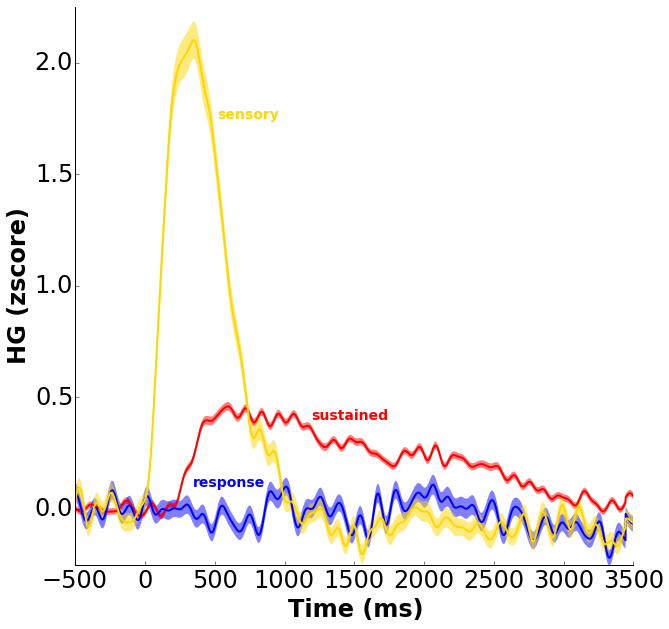

In [12]:
f, ax = plt.subplots(1, 1, figsize = (10,10))

#extract latency
lats = (np.argmax(alldata.mean(axis =0))-500)
lats_resp = (np.argmax(alldata_resp.mean(axis = 0))-500)
lats_SR = np.argmax(alldata_SR.mean(axis = 0))-500
#lats_fromoffset = (np.argmax(alldata.mean(axis = 0)[offset:])-500)

#save data
filename = os.path.join(savedir, 'trace_data', 'trace_data_empty.mat')
spio.savemat(filename, {'data':alldata, 'data_resp':alldata_resp, 'data_SR': alldata_SR, 'lats_SR':lats_SR, 'lats':lats, 'lats_resp':lats_resp})
    
#plot
ax.plot(np.arange(-500, alldata.shape[1]-500), alldata.mean(axis = 0), color = 'r', lw = 2)#, label = 'Sustained (%i trials)' %(alldata.shape[0]))
sem = np.std(alldata, axis = 0)/np.sqrt(alldata.shape[1])
ax.fill_between(np.arange(-500, alldata.shape[1]-500), alldata.mean(axis = 0)+sem, alldata.mean(axis=0)-sem, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = 'r', label = None)
ax.annotate('sustained', xy = (1200, .4), color = 'r', fontsize = 14, weight = 'bold')

ax.plot(np.arange(-500, alldata_resp.shape[1]-500), alldata_resp.mean(axis = 0), color = 'b', lw = 2)#, label = 'Response (%i trials)' %(alldata_resp.shape[0]))
sem = np.std(alldata_resp, axis = 0)/np.sqrt(alldata_resp.shape[0])
ax.fill_between(np.arange(-500, alldata_resp.shape[1]-500), alldata_resp.mean(axis = 0)+sem, alldata_resp.mean(axis=0)-sem, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = 'blue', label = None)
ax.annotate('response', xy = (350, 0.1), color = 'b', fontsize = 14, weight = 'bold')

ax.plot(np.arange(-500, alldata_SR.shape[1]-500), alldata_SR.mean(axis = 0), color = 'gold', lw = 2)#, label = 'Sensory (%i trials)' %(alldata_resp.shape[0]))
sem = np.std(alldata_SR, axis = 0)/np.sqrt(alldata_SR.shape[0])
ax.fill_between(np.arange(-500, alldata_SR.shape[1]-500), alldata_SR.mean(axis = 0)+sem, alldata_SR.mean(axis=0)-sem, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = 'gold', label = None)
ax.annotate('sensory', xy = (525, 1.75), color = 'gold', fontsize = 14, weight = 'bold')

#ax.plot(lats, alldata.mean(axis = 0)[lats+500], 'o', color = 'k', markersize = 5)#, label = 'Peak : %i ms' %(lats))

#ax.legend(loc = 'upper right')
ax.autoscale(tight = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_ylabel('HG (zscore)', fontsize = 24, weight = 'bold')
ax.set_xlabel('Time (ms)', fontsize = 24, weight = 'bold')
ax.xaxis.set_tick_params(labelsize = 24)
ax.yaxis.set_tick_params(labelsize = 24)
ax.set_ylim([-0.25, 2.25])
ax.set_xlim([-500, 3500])

filename = os.path.join(savedir, 'binned_RTs_empty_zscore.png')
plt.savefig(filename)#, dpi = 300)

print savedir

# empty vs real

In [15]:
#load data (without my data, without SR)
p = 'D'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR_empty.mat')
data_dict = loadmat.loadmat(filename)
alldata_empty, allsubjs_empty = [data_dict.get(key) for key in ['alldata', 'allsubjs']]

filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
data_dict = loadmat.loadmat(filename)
alldata, allRTs, allsubjs, alltasks = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks']]


p = 'R'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR_empty.mat')
data_dict = loadmat.loadmat(filename)
alldata_resp_empty, allsubjs_resp_empty = [data_dict.get(key) for key in ['alldata', 'allsubjs']]

filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
data_dict = loadmat.loadmat(filename)
alldata_resp, allRTs_resp, allsubjs_resp, alltasks_resp = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks']]


p = 'SR'
filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR_empty.mat')
data_dict = loadmat.loadmat(filename)
alldata_SR_empty, allsubjs_SR_empty = [data_dict.get(key) for key in ['alldata', 'allsubjs']]

filename= os.path.join(SJdir, 'SingleTrials','alltrials','data', 'singletrials_allelecs_smooth_nodecision_' + p + '_dropSR.mat')
data_dict = loadmat.loadmat(filename)
alldata_SR, allRTs_SR, allsubjs_SR, alltasks_SR = [data_dict.get(key) for key in ['alldata', 'allRTs', 'allsubjs', 'alltasks']]

In [16]:
unique(alltasks)

array([u'EmoGen', u'EmoRep', u'FaceEmo', u'FaceGen', u'SelfAud', u'SelfVis'], dtype=object)

In [17]:

D = {'data': alldata, 'subjs':allsubjs, 'tasks':alltasks,'RTs':allRTs, 'data_empty': alldata_empty, 'subjs_empty':allsubjs_empty, 'color' : 'r'}
R = {'data': alldata_resp, 'subjs':allsubjs_resp,'tasks':alltasks_resp, 'RTs':allRTs_resp, 'data_empty': alldata_resp_empty, 'subjs_empty':allsubjs_resp_empty, 'color' : 'b'}
SR = {'data': alldata_SR, 'subjs':allsubjs_SR, 'tasks':alltasks_SR, 'RTs':allRTs_SR, 'data_empty': alldata_SR_empty, 'subjs_empty':allsubjs_SR_empty, 'color' : 'gold'}
data_dict = {'D':D, 'SR':SR, 'R':R}



In [7]:
print sum(data_dict['R']['subjs_empty'] == 'JH2')
print len(data_dict['R']['RTs'])
print len(data_dict['R']['subjs_empty'])


92
19752
596


In [8]:
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}

plt.rcParams.update(params)

('SR', 'GP15', 168, 2922.1428571428573)
('SR', 'GP35', 126, 2144.5714285714284)
('SR', 'JH2', 276, 2246.8478260869565)
('D', 'GP15', 714, 2922.1428571428573)
('D', 'GP35', 238, 2144.5714285714284)
('D', 'JH2', 782, 2246.8478260869565)
('R', 'GP15', 336, 2922.1428571428573)
('R', 'GP35', 168, 2144.5714285714284)
('R', 'JH2', 92, 2246.8478260869565)


'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/exit/empties.png'

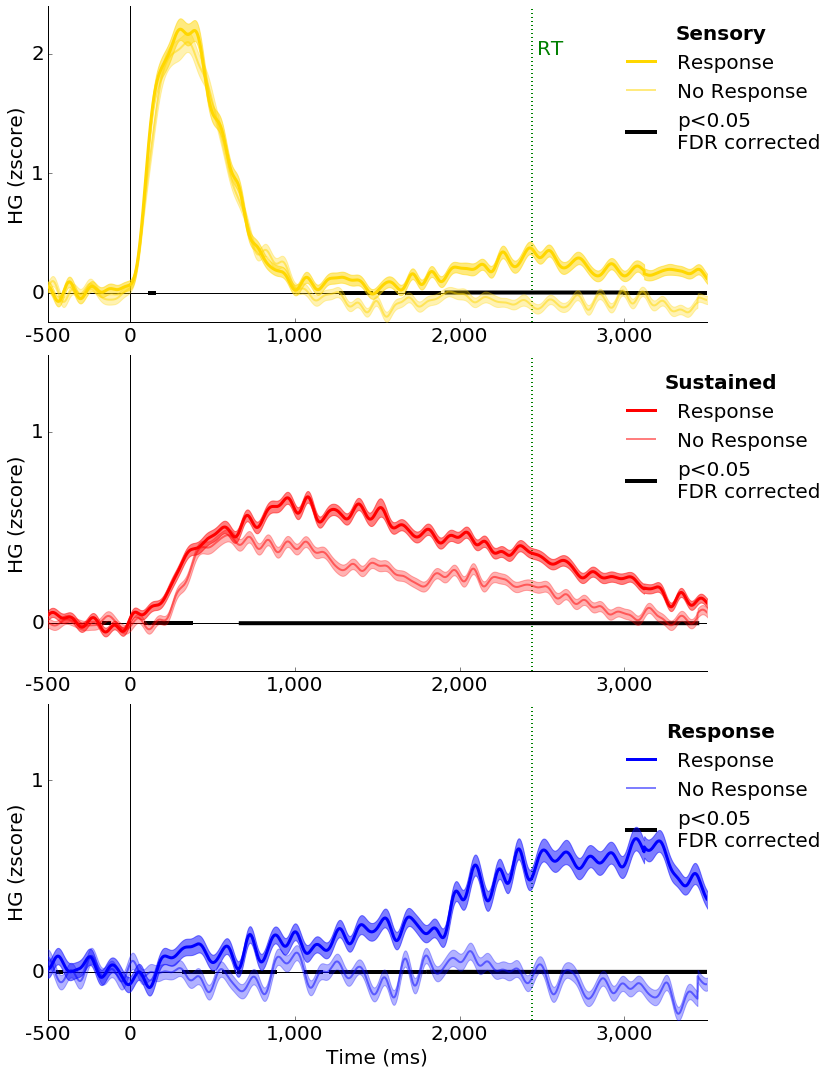

In [24]:
#calculate difference & plot
f, ax = plt.subplots(3,1, figsize = (10,15))

D = {'data': alldata, 'subjs':allsubjs,'tasks':alltasks, 'RTs':allRTs, 'data_empty': alldata_empty, 'subjs_empty':allsubjs_empty, 'color' : 'r', 'name' : 'Sustained'}
R = {'data': alldata_resp, 'subjs':allsubjs_resp,'tasks':alltasks_resp, 'RTs':allRTs_resp, 'data_empty': alldata_resp_empty, 'subjs_empty':allsubjs_resp_empty, 'color' : 'b', 'name' : "Response"}
SR = {'data': alldata_SR, 'subjs':allsubjs_SR,'tasks':alltasks_SR, 'RTs':allRTs_SR, 'data_empty': alldata_SR_empty, 'subjs_empty':allsubjs_SR_empty, 'color' : 'gold', 'name' : "Sensory"}
data_dict = {'D':D, 'SR':SR, 'R':R}


bl_st = -500
patterns = ['SR','D','R']

for k, p in enumerate(patterns):
    if k > 0:
        previous_RTs = RTs
    else:
        previous_RTs = 0
    
    [data , subjs, tasks, RTs , data_empty, subjs_empty, c, name] = [data_dict[p][x] for x in ['data', 'subjs', 'tasks', 'RTs', 'data_empty', 'subjs_empty', 'color', 'name']]

    #adjust length
    if data.shape[1] > data_empty.shape[1]:
        data = data[:,:data_empty.shape[1]]
    else:
        data_empty = data_empty[:,:data.shape[1]]

    #resample data and RTs to match number of empty trials (matching number of trials per subject)
    num_trials = [sum(subjs_empty == x) for x in ['GP15','GP35','JH2']]
    
    idx = np.argsort(RTs) #sort subjs and data by RT
    idx = idx[::-1] #reverse to descending so get longest trials first
    RTs = RTs[idx]
    subjs = subjs[idx]
    tasks = tasks[idx]
    data = data[idx,:]
    idxa = [True if x in ['GP15','GP35', 'JH2'] else False for x in subjs] #pull data only from relevant subjs
    idxb = [True if x == 'EmoGen' else False for x in tasks]
    idx2 = [a*b for a,b in zip(idxa,idxb)]
    data = data[np.where(idx2)]
    subjs = subjs[np.where(idx2)]
    RTs = RTs[np.where(idx2)]

    tmp, tmp2 = [[] for q in range(2)]
    for i, s in enumerate(['GP15','GP35', 'JH2']): #extract relevant number of trials per subject
        tmp.extend(data[subjs == s,:][:num_trials[i],:])
        tmp2.extend([mean(RTs[subjs == s][:num_trials[i]])])
        print (p, s, num_trials[i], mean(RTs[subjs == s][:num_trials[i]]))
    
    data = np.array(tmp)
    RTs = np.array(tmp2)
       
    #calculate significance
    pvals = list()
    for j in np.arange(0, data.shape[1]):
        (t, pval) = stats.ttest_ind(data[:,j], data_empty[:,j])
        pvals.append(pval)
    thr = fdr_correct.fdr2(pvals, q = 0.05)
    H = np.array(np.array(pvals<thr)).astype('int')

    if (thr>0):

        #find elecs with window 
        difference = np.diff(H, n = 1, axis = 0)
        start_idx = np.where(difference==1)[0]+1
        end_idx = np.where(difference == -1)[0]

        if start_idx.size > end_idx.size: #last chunk goes until end
            end_idx = np.append(end_idx, int(data.shape[1]-abs(bl_st)))

        elif start_idx.size < end_idx.size:
            start_idx = np.append(0, start_idx) #starts immediately significant

        if (start_idx.size!=0):
            if (start_idx[0] > end_idx[0]): #starts immediately significant
                start_idx = np.append(0, start_idx)

        if (start_idx.size!=0):
            if (end_idx[-1] < start_idx[-1]):#significant until end
                end_idx = np.append(end_idx, int(data.shape[1]-abs(bl_st)))
        start_idx = start_idx + bl_st
        end_idx = end_idx + bl_st
    else:
        start_idx = np.zeros((1,))
        end_idx = np.zeros((1,))


    ax[k].axhline(y = 0, color = 'k', lw = 1)
    ax[k].axvline(x = 0, color = 'k', lw = 1)    

#     ax[k].plot(np.arange(-500, data.shape[1]-500), data.mean(axis = 0), color = c, lw = 3, label = name, zorder = 10)#'%s - %i trials' %(p, data.shape[0]))
#     sem = np.std(data, axis = 0)/np.sqrt(data.shape[0]-1)
#     ax[k].fill_between(np.arange(-500, data.shape[1]-500), data.mean(axis = 0)+sem, data.mean(axis=0)-sem, zorder = 10, edgecolor = 'k', facecolor = c, label = name)

#     ax[k].plot(np.arange(-500, data_empty.shape[1]-500), data_empty.mean(axis = 0), color = c, alpha = 0.5, lw = 2, label = 'No Response', zorder = 8) # - %i trials' %(data_empty.shape[0]))
#     sem = np.std(data_empty, axis = 0)/np.sqrt(data_empty.shape[0]-1)
#     ax[k].fill_between(np.arange(-500, data_empty.shape[1]-500), data_empty.mean(axis = 0)+sem, data_empty.mean(axis=0)-sem, alpha = 0.5, zorder = 8, edgecolor = c, facecolor = c, label = 'No Response')

    ax[k].plot(np.arange(-500, data.shape[1]-500), data.mean(axis = 0), color = c, lw = 3, label = 'Response', zorder = 10)#'%s - %i trials' %(p, data.shape[0]))
    sem = np.std(data, axis = 0)/np.sqrt(data.shape[0]-1)
    ax[k].fill_between(np.arange(-500, data.shape[1]-500), data.mean(axis = 0)+sem, data.mean(axis=0)-sem, zorder = 10, edgecolor = c, facecolor = c, alpha = 0.5, label = '_nolegend_')

    ax[k].plot(np.arange(-500, data_empty.shape[1]-500), data_empty.mean(axis = 0), color = c, alpha = 0.5, lw = 2, label = 'No Response', zorder = 8) # - %i trials' %(data_empty.shape[0]))
    sem = np.std(data_empty, axis = 0)/np.sqrt(data_empty.shape[0]-1)
    ax[k].fill_between(np.arange(-500, data_empty.shape[1]-500), data_empty.mean(axis = 0)+sem, data_empty.mean(axis=0)-sem, alpha = 0.3, zorder = 8, edgecolor = c, facecolor = c, label = '_nolegend_')

    ax[k].axvline(x = RTs.mean(), color = 'g', lw = 2, ls = ':')#, label = 'Mean RT')# - %ims' %(RTs.mean()))

    #ax[k].set_title(name, fontsize = 22, weight = 'bold')
    
    if start_idx.size>0:
        for i, s in enumerate(start_idx):
            tmp = np.arange(s, end_idx[i])
            start = s
            finish = end_idx[i]
            ax[k].plot(tmp, np.zeros(tmp.size), color = 'black', linewidth = 4)#, label = (start, finish))
        ax[k].plot(tmp, np.zeros(tmp.size), color = 'black', linewidth = 4, label = 'p<0.05\nFDR corrected')
        #ax[k].plot(tmp, np.zeros(tmp.size), color = 'black', linewidth = 4, label = r"$p$" " < 0.01\n(>100 ms)")
        
    ax[k].autoscale(tight = True)
    ax[k].spines['top'].set_visible(False)
    ax[k].spines['right'].set_visible(False)
    ax[k].get_xaxis().tick_bottom()
    ax[k].get_yaxis().tick_left()
    ax[k].set_ylabel('HG (zscore)', fontsize = 20)
    ax[k].xaxis.set_tick_params(labelsize = 20)
    ax[k].yaxis.set_tick_params(labelsize = 20)
    ax[k].set_xlim([-500, 3500])
    ax[k].set_xticks([-500, 0, 1000, 2000, 3000])
    ax[k].set_yticks(np.arange(0, 3, 1))
    ax[k].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    handles, labels = ax[k].get_legend_handles_labels()
    lgnd = ax[k].legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2,1), fontsize = 20, frameon = False, title = name)    
    ax[k].get_legend().get_title().set_fontsize(20)
    ax[k].get_legend().get_title().set_fontweight('bold')
    
ax[0].annotate('RT', xy = (RTs.mean()+30, 2), color = 'green', fontsize = 20)    
ax[0].set_ylim([-0.25, 2.4])

ax[1].set_ylim([-0.25, 1.4])

ax[2].set_ylim([-0.25, 1.4])
ax[2].set_xlabel('Time (ms)', fontsize = 20)


f.tight_layout()

#filename = os.path.join(savedir, 'binned_RTs_zscore_real_vs_empty_all.png')

filename = os.path.join(SJdir, 'PCA', 'exit', 'empties.png')
f.savefig(filename, bbox_extra_artists=(lgnd,), bbox_inches='tight', dpi = 150)

filename

# calculate relative to zero (for empty response trace)

In [10]:
#calculate difference & plot only for empty trial relative to zero

D = {'data': alldata, 'subjs':allsubjs,'tasks':alltasks, 'RTs':allRTs, 'data_empty': alldata_empty, 'subjs_empty':allsubjs_empty, 'color' : 'r', 'name' : 'Spatiotemporal\nIntegration'}
R = {'data': alldata_resp, 'subjs':allsubjs_resp,'tasks':alltasks_resp, 'RTs':allRTs_resp, 'data_empty': alldata_resp_empty, 'subjs_empty':allsubjs_resp_empty, 'color' : 'b', 'name' : "Response"}
SR = {'data': alldata_SR, 'subjs':allsubjs_SR,'tasks':alltasks_SR, 'RTs':allRTs_SR, 'data_empty': alldata_SR_empty, 'subjs_empty':allsubjs_SR_empty, 'color' : 'gold', 'name' : "Sensory"}
data_dict = {'D':D, 'SR':SR, 'R':R}

'/home/knight/matar/MATLAB/DATA/Avgusta/SingleTrials/alltrials/data/singletrials_allelecs_smooth_nodecision_SR_dropSR.mat'

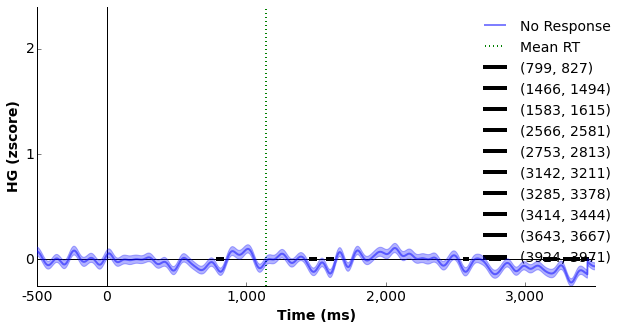

In [19]:
f, ax = plt.subplots(figsize = (10,5))

bl_st = -500
patterns = ['R']

for k, p in enumerate(patterns):
    if k > 0:
        previous_RTs = RTs
    else:
        previous_RTs = 0
    
    [data , subjs, tasks, RTs , data_empty, subjs_empty, c, name] = [data_dict[p][x] for x in ['data', 'subjs', 'tasks', 'RTs', 'data_empty', 'subjs_empty', 'color', 'name']]

    #adjust length
    if data.shape[1] > data_empty.shape[1]:
        data = data[:,:data_empty.shape[1]]
    else:
        data_empty = data_empty[:,:data.shape[1]]

    #calculate significance
    pvals = list()
    for j in np.arange(0, data_empty.shape[1]):
        (t, pval) = stats.ttest_1samp(data_empty[:,j],0)
        pvals.append(pval)
    thr = fdr_correct.fdr2(pvals, q = 0.05)
    H = np.array(np.array(pvals<thr)).astype('int')

    if (thr>0):

        #find elecs with window 
        difference = np.diff(H, n = 1, axis = 0)
        start_idx = np.where(difference==1)[0]+1
        end_idx = np.where(difference == -1)[0]

        if start_idx.size > end_idx.size: #last chunk goes until end
            end_idx = np.append(end_idx, int(data.shape[1]-abs(bl_st)))

        elif start_idx.size < end_idx.size:
            start_idx = np.append(0, start_idx) #starts immediately significant

        if (start_idx.size!=0):
            if (start_idx[0] > end_idx[0]): #starts immediately significant
                start_idx = np.append(0, start_idx)

        if (start_idx.size!=0):
            if (end_idx[-1] < start_idx[-1]):#significant until end
                end_idx = np.append(end_idx, int(data.shape[1]-abs(bl_st)))
        start_idx = start_idx + bl_st
        end_idx = end_idx + bl_st
    else:
        start_idx = np.zeros((1,))
        end_idx = np.zeros((1,))


    ax.axhline(y = 0, color = 'k', lw = 1)
    ax.axvline(x = 0, color = 'k', lw = 1)    

    ax.plot(np.arange(-500, data_empty.shape[1]-500), data_empty.mean(axis = 0), color = c, alpha = 0.5, lw = 2, label = 'No Response', zorder = 8) # - %i trials' %(data_empty.shape[0]))
    sem = np.std(data_empty, axis = 0)/np.sqrt(data_empty.shape[0]-1)
    ax.fill_between(np.arange(-500, data_empty.shape[1]-500), data_empty.mean(axis = 0)+sem, data_empty.mean(axis=0)-sem, alpha = 0.3, zorder = 8, edgecolor = c, facecolor = c, label = 'No Response')

    ax.axvline(x = RTs.mean(), color = 'g', lw = 2, ls = ':', label = 'Mean RT')# - %ims' %(RTs.mean()))

    if start_idx.size>0:
        for i, s in enumerate(start_idx):
            tmp = np.arange(s, end_idx[i])
            start = s
            finish = end_idx[i]
            ax.plot(tmp, np.zeros(tmp.size), color = 'black', linewidth = 4, label = (start, finish))
        #ax[k].plot(tmp, np.zeros(tmp.size), color = 'black', linewidth = 4, label = 'p<0.05\nFDR corrected')
        #ax.plot(tmp, np.zeros(tmp.size), color = 'black', linewidth = 4, label = r"$p$" " < 0.01\n(>100 ms)")
        
    ax.autoscale(tight = True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_ylabel('HG (zscore)', fontsize = 14, weight = 'bold')
    ax.set_xlabel('Time (ms)', fontsize = 14, weight = 'bold')
    ax.xaxis.set_tick_params(labelsize = 14)
    ax.yaxis.set_tick_params(labelsize = 14)
    ax.set_ylim([-0.25, 2.4])
    ax.set_xlim([-500, 3500])
    ax.set_xticks([-500, 0, 1000, 2000, 3000])
    ax.set_yticks(np.arange(0, 3, 1))
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    handles, labels = ax.get_legend_handles_labels()
    lgnd = ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05,1), fontsize = 14, frameon = False)    

#filename = os.path.join(savedir, 'binned_RTs_zscore_real_vs_empty_all.png')
#f.savefig(filename, bbox_extra_artists=(lgnd,), bbox_inches='tight')

#filename = os.path.join(SJdir, 'PCA', 'Figures', 'binned_RTs_zscore_real_vs_empty_all_nolabeledwindows_outline_commas.png')
#f.savefig(filename, bbox_inches='tight', dpi = 150)

filename

###old

In [64]:
for i, e in enumerate(active_elecs):
    data = alldata[i,:,:].squeeze()
    try: 
        pattern = df[(df.elec == e) & (df.subj == subj) & (df.task == task)].pattern.iloc[0]
    except:
        continue
    #plot
    f,ax = plt.subplots(figsize = (10, 10))
    ax.autoscale(enable = True, tight = True)
    ax.patch.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.xaxis.set_tick_params(labelsize = 24)
    ax.yaxis.set_tick_params(labelsize = 24)
    cax = ax.pcolormesh(np.arange(-500, data.shape[1]-500), np.arange(0, len(data)), data) #* abs(data)>1.96, zorder = 0)# , cmap = plt.get_cmap('bwr_r'))
    cbar = f.colorbar(cax, orientation = 'vertical', ticks = [-5, 0 , 5])
    cax.set_clim(vmin=-5,vmax=5)
    ax.set_title('%s %s - e%s - %s' %(subj, task, e, pattern))
    
    filename = os.path.join(SJdir, 'SingleTrials','empties', '%s_%s_%s_%s.png' %(subj, task, e, pattern))
    plt.savefig(filename)
    plt.close('all')

(31,)